In [184]:
import numpy as np
import matplotlib.pyplot as plt

In [185]:
def plot(data):
    fig, ax = plt.subplots()
    ax.axis('off')
    table = ax.table(cellText = data, loc = 'center')
    table.auto_set_font_size(True)
    # table.set_fontsize(12)
    table.scale(1, 1) 
    
    # Setting Colors
    for coors in [(1, 1), (1, 2), (2, 2), (3, 1), (3, 3), (4, 1)] :
        table[coors].set_facecolor('orange')
    table[(3, 2)].set_facecolor("skyblue")

In [186]:
data = np.zeros((5, 5))

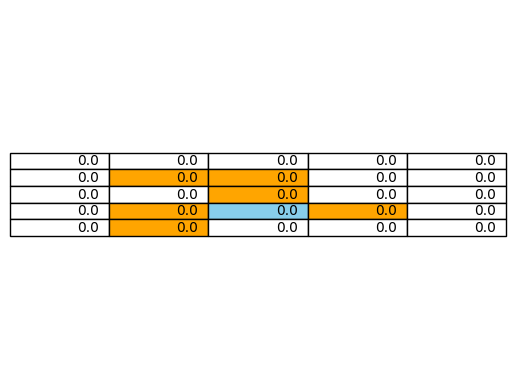

In [187]:
plot(data)

In [188]:
actions = ["STAY", "UP", "DOWN", "LEFT", "RIGHT"]
actions_coords = {
    "STAY" : (0, 0),
    "UP" : (-1, 0),
    "DOWN" : (1, 0),
    "LEFT" : (0, -1),
    "RIGHT" : (0, 1)
}

In [189]:
q_values = np.zeros((5, 5, 5))
values = np.zeros((5, 5))
values[3, 2] = 1
forbidden_states = [(1, 1), (1, 2), (2, 2), (3, 1), (3, 3), (4, 1)]
policy = np.random.choice(actions, size = (5, 5))

print(policy)
gamma = 0.9
alpha = 0.05

[['STAY' 'DOWN' 'RIGHT' 'UP' 'LEFT']
 ['RIGHT' 'LEFT' 'LEFT' 'STAY' 'UP']
 ['RIGHT' 'DOWN' 'DOWN' 'RIGHT' 'DOWN']
 ['LEFT' 'LEFT' 'UP' 'UP' 'STAY']
 ['STAY' 'DOWN' 'STAY' 'UP' 'STAY']]


Monte Carlo Basic

In [190]:
iterations = 50

In [191]:
for each_state in range(iterations):
    for i in range(5):
        for j in range(5):
            for k, action in enumerate(actions):
                # print((i, j), action)
                q_value = 0
                n=0
                i2, j2 = actions_coords[action]
                i3 , j3 = i + i2, j + j2
                while True:
                    
                    if (i3, j3) == (3, 2):
                        r = 1
                        
                    elif (i3, j3) in forbidden_states:
                        r = -10
                        
                    elif i3 < 0 or i3 > 4 or j3 < 0 or j3 > 4:
                        r = -1
                        i3, j3 = i, j
                    else:
                        r = 0

                    q_value += r * gamma ** n 
                    
                    i2, j2 = actions_coords[policy[i3, j3]]  
                    i3 += i2
                    j3 += j2
                    if r == 1:
                        break
                    if n >=50:
                        break
                    n += 1
                q_values[i, j, k] += alpha * (q_value - q_values[i, j, k])
            policy[i, j] = actions[np.argmax(q_values[i, j])]
            
                

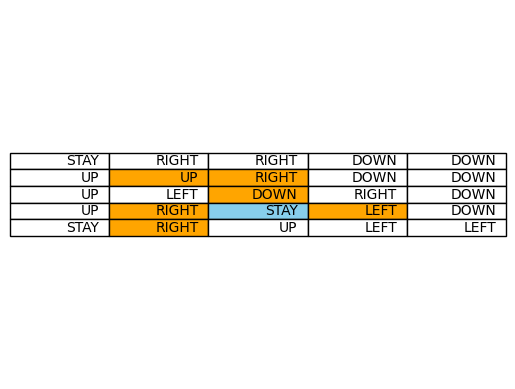

In [192]:
plot(policy)

Monte Carlo Exploring Starts

In [193]:
q_values = np.zeros((5, 5, 5))
values = np.zeros((5, 5))
values[3, 2] = 1
forbidden_states = [(1, 1), (1, 2), (2, 2), (3, 1), (3, 3), (4, 1)]
policy = np.random.choice(actions, size = (5, 5))

print(policy)
gamma = 0.9
alpha = 0.05

[['STAY' 'UP' 'DOWN' 'LEFT' 'STAY']
 ['UP' 'DOWN' 'DOWN' 'RIGHT' 'DOWN']
 ['RIGHT' 'RIGHT' 'STAY' 'RIGHT' 'DOWN']
 ['STAY' 'RIGHT' 'UP' 'UP' 'STAY']
 ['RIGHT' 'UP' 'DOWN' 'DOWN' 'UP']]


In [194]:
for each_state in range(iterations):
    for i in range(5):
        for j in range(5):
            for k, action in enumerate(actions):
                episodes = []
                q_value = 0
                n=0
                state = (i, j)

                while True:
                    si, sj = state
                    k = actions.index(action)
                    i2, j2 = actions_coords[action]
                    i3 , j3 = si + i2, sj + j2
                    
                    if (i3, j3) == (3, 2):
                        r = 1
                        
                    elif (i3, j3) in forbidden_states:
                        r = -10
                        
                    elif i3 < 0 or i3 > 4 or j3 < 0 or j3 > 4:
                        r = -1
                        i3, j3 = si, sj
                    else:
                        r = 0

                    
                    episodes.append((si,sj,k,r))

                    state = (i3, j3)
                    action = policy[state]
                    if r == 1:
                        break
                    if n >=50:
                        break
                    n += 1
                    
                value = 0
                for  i,j,k, r in reversed(episodes):
                    value = r + gamma * value
                    q_values[i,j,k] += alpha * (value - q_values[i, j, k])
                    
            policy[i, j] = actions[np.argmax(q_values[i, j])]
            
                

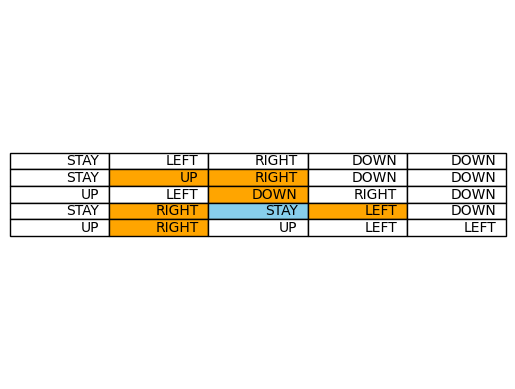

In [195]:
plot(policy)

E-Greedy MC

In [206]:
q_values = np.zeros((5, 5, 5))
values = np.zeros((5, 5))
values[3, 2] = 1
forbidden_states = [(1, 1), (1, 2), (2, 2), (3, 1), (3, 3), (4, 1)]
policy = np.random.choice(actions, size = (5, 5))

print(policy)
gamma = 0.9
alpha = 0.05
epsilon = 0.1
epsilon_min = 0.01
decay = 0.9
iterations = 100

[['UP' 'DOWN' 'STAY' 'STAY' 'RIGHT']
 ['STAY' 'RIGHT' 'DOWN' 'RIGHT' 'UP']
 ['DOWN' 'RIGHT' 'DOWN' 'LEFT' 'LEFT']
 ['RIGHT' 'UP' 'LEFT' 'STAY' 'STAY']
 ['RIGHT' 'STAY' 'DOWN' 'STAY' 'LEFT']]


In [207]:
for each_state in range(iterations):
    for i in range(5):
        for j in range(5):
            for k, action in enumerate(actions):
                episodes = []
                q_value = 0
                n=0
                state = (i, j)

                while True:
                    si, sj = state
                    k = actions.index(action)
                    i2, j2 = actions_coords[action]
                    i3 , j3 = si + i2, sj + j2
                    
                    if (i3, j3) == (3, 2):
                        r = 1
                        
                    elif (i3, j3) in forbidden_states:
                        r = -10
                        
                    elif i3 < 0 or i3 > 4 or j3 < 0 or j3 > 4:
                        r = -1
                        i3, j3 = si, sj
                    else:
                        r = 0

                    
                    episodes.append((si,sj,k,r))

                    state = (i3, j3)
                    action = policy[state]
                    if r == 1:
                        break
                    if n >=100:
                        break
                    n += 1
                    
                value = 0
                for  i,j,k, r in reversed(episodes):
                    value = r + gamma * value
                    q_values[i,j,k] += alpha * (value - q_values[i, j, k])

            if np.random.random()>epsilon:
                policy[i, j] = actions[np.argmax(q_values[i, j])]
            else:
                policy[i, j] = np.random.choice(actions)

    epsilon = min(epsilon, epsilon * decay)
            
                

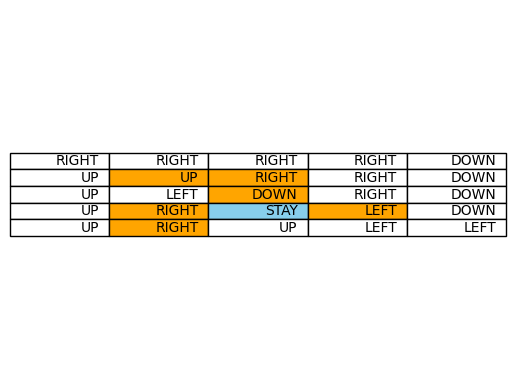

In [208]:
plot(policy)